<a href="https://colab.research.google.com/github/biggiesmalls2/LS-2024-Machine-learningww/blob/main/CNN_assign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten


In [110]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [111]:
data=tf.keras.preprocessing.image_dataset_from_directory(
    directory='/content/drive/MyDrive/data',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 1657 files belonging to 4 classes.


In [112]:
data_iterator = data.as_numpy_iterator()

In [114]:
batch=data_iterator.next()

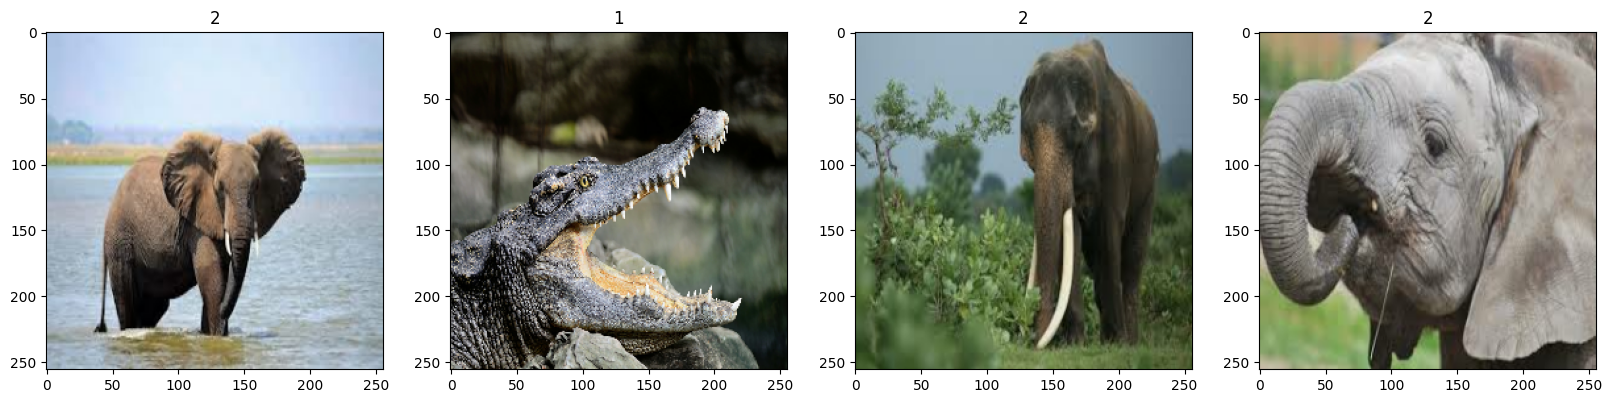

In [115]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [116]:
normalization_layer = layers.Rescaling(1./255)
data=data.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(data))
first_image = image_batch[0]

In [117]:
# Calculate number of batches
total_batches = tf.data.experimental.cardinality(data).numpy()

# Ratios
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

# Calculate number of batches for train, validation, and test sets
train_batches = int(total_batches * train_ratio)
val_batches = int(total_batches * val_ratio)
test_batches = int(total_batches * test_ratio)

# Split the dataset
train_data = data.take(train_batches)
val_data = data.skip(train_batches).take(val_batches)
test_data = data.skip(train_batches + val_batches).take(test_batches)


In [118]:

input_shape = (256, 256, 3)

# Number of classes for classification (e.g., 10 classes)
num_classes = 4

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])




In [119]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [120]:
history = model.fit(
    train_data,
    epochs=15,
    validation_data=val_data,
    verbose=1
)


Epoch 1/15
36/36 [==============================] - 172s 5s/step - loss: 3.0563 - accuracy: 0.2821 - val_loss: 1.3329 - val_accuracy: 0.4844
Epoch 2/15
36/36 [==============================] - 150s 4s/step - loss: 1.2194 - accuracy: 0.4627 - val_loss: 1.2131 - val_accuracy: 0.5250
Epoch 3/15
36/36 [==============================] - 142s 4s/step - loss: 0.8121 - accuracy: 0.7005 - val_loss: 0.8800 - val_accuracy: 0.6281
Epoch 4/15
36/36 [==============================] - 153s 4s/step - loss: 0.4751 - accuracy: 0.8507 - val_loss: 0.6713 - val_accuracy: 0.7688
Epoch 5/15
36/36 [==============================] - 153s 4s/step - loss: 0.2614 - accuracy: 0.9297 - val_loss: 0.6658 - val_accuracy: 0.8031
Epoch 6/15
36/36 [==============================] - 153s 4s/step - loss: 0.1315 - accuracy: 0.9566 - val_loss: 0.5693 - val_accuracy: 0.8062
Epoch 7/15
36/36 [==============================] - 154s 4s/step - loss: 0.0787 - accuracy: 0.9844 - val_loss: 0.8572 - val_accuracy: 0.7969
Epoch 8/15
36

KeyboardInterrupt: 

In [126]:
loss,accuracy=model.evaluate(test_data, verbose=2)


5/5 - 24s - loss: 1.2001 - accuracy: 0.7312 - 24s/epoch - 5s/step


In [123]:
# Do not change this code
if accuracy>=0.85:
  print(f"Congratulations, CNN assignment complete!! Your accuracy is {accuracy}")
else:
  print(f"Try again, not enough accuracy! Your accuracy is {accuracy}" )

Try again, not enough accuracy! Your accuracy is 0.75
